https://www.kaggle.com/competitions/playground-series-s3e2/discussion


https://www.kaggle.com/competitions/playground-series-s3e1/discussion

In [1]:
DATA_DIR='playground-series-s3e4/'

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import importlib

In [3]:
#load and reload if changed functions for data investigation, plots etc
import data_investigation_lib as DI
#importlib.reload(data_investigation_lib);

In [4]:
df=pd.read_csv(DATA_DIR+"/train.csv").iloc[:,1:] #drop ID
dfSub=pd.read_csv(DATA_DIR+"/test.csv").iloc[:,1:]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [5]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33.3%,31.000000,684.666667,3.000000,3.000000,1.0,2.000000,57.000000,3.000000,1.000000,2.000000,...,80.0,0.000000,7.000000,2.000000,3.000000,4.000000,2.000000,0.000000,2.000000,0.000000
50%,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
66.7%,39.000000,1116.000000,9.000000,3.000000,1.0,3.000000,79.000000,3.000000,2.000000,4.000000,...,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,6.000000,1.000000,7.000000,0.000000
100%,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000
max,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [5]:
DI.nans(df)

0 rows with nans out of 219129
0 nans Time
0 nans V1
0 nans V2
0 nans V3
0 nans V4
0 nans V5
0 nans V6
0 nans V7
0 nans V8
0 nans V9
0 nans V10
0 nans V11
0 nans V12
0 nans V13
0 nans V14
0 nans V15
0 nans V16
0 nans V17
0 nans V18
0 nans V19
0 nans V20
0 nans V21
0 nans V22
0 nans V23
0 nans V24
0 nans V25
0 nans V26
0 nans V27
0 nans V28
0 nans Amount
0 nans Class


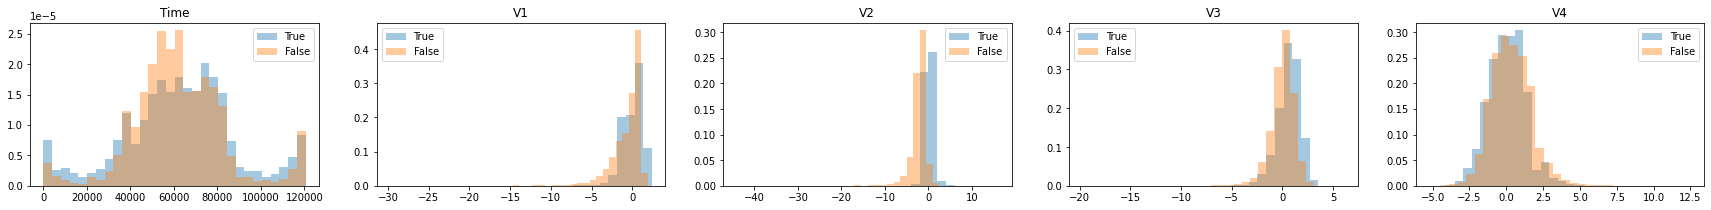

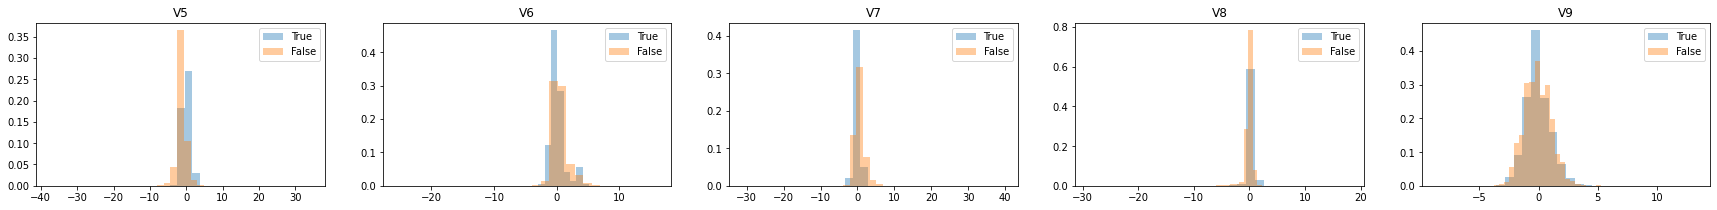

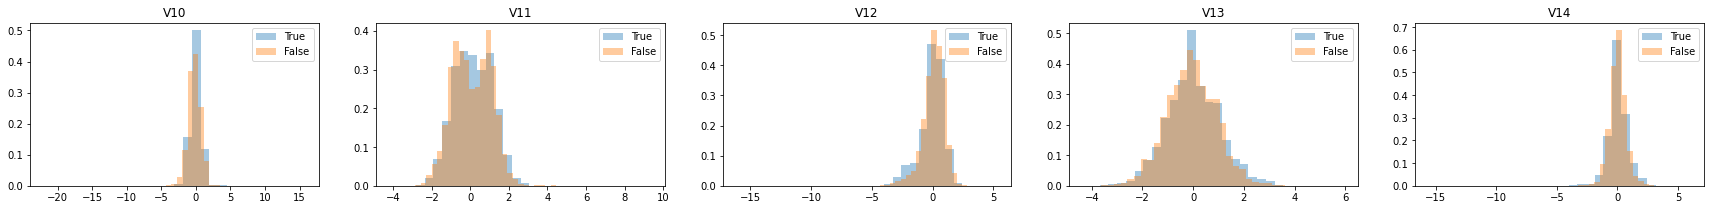

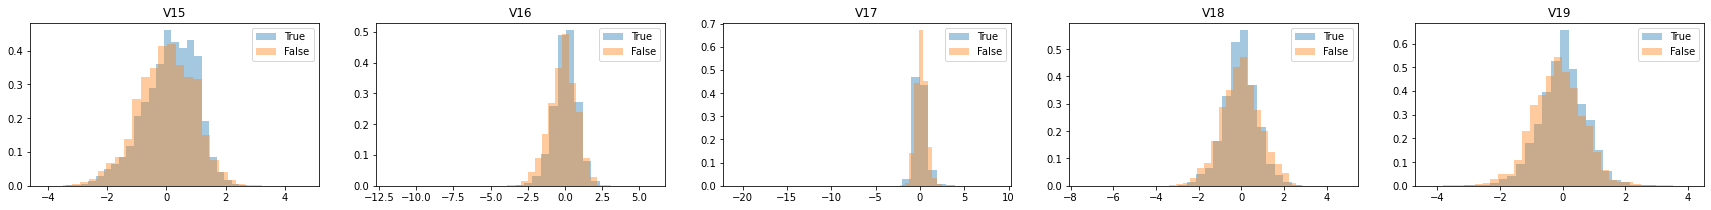

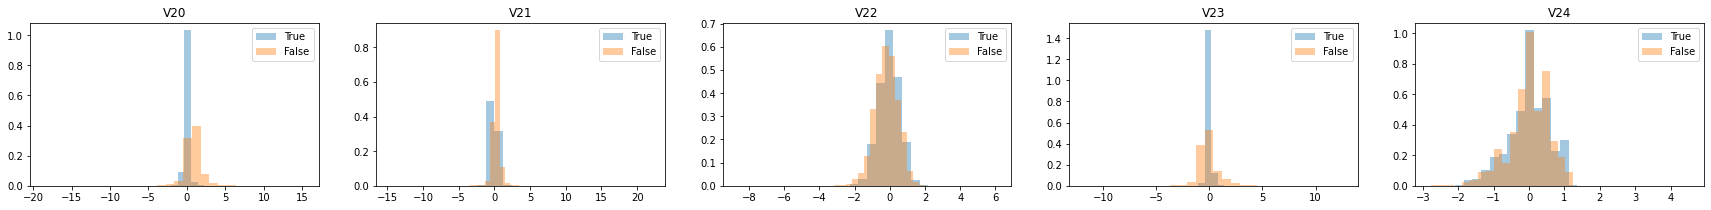

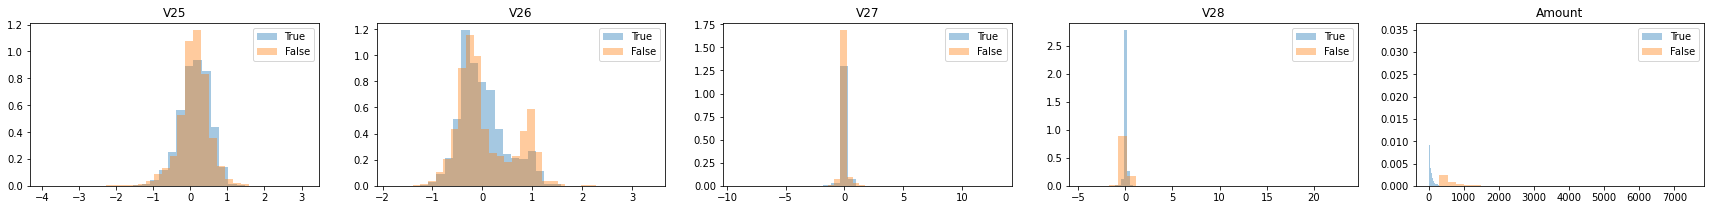

In [21]:
dfSub2=dfSub.copy()
dfSub2[df.columns[-1]]=2
dfView=pd.concat([df])#,dfSub2])
dfView["Sep"]=dfView["Amount"]<300

alpha=0.4
DI.hists(dfView.iloc[:,:5],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
DI.hists(dfView.iloc[:,5:10],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
DI.hists(dfView.iloc[:,10:15],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
DI.hists(dfView.iloc[:,15:20],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
DI.hists(dfView.iloc[:,20:25],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
DI.hists(dfView.iloc[:,25:30],color=dfView.iloc[:,-1],norm=True,alpha=alpha)
#DI.hists(dfView.iloc[:,30:],color=dfView.iloc[:,-1],norm=True,alpha=alpha)

In [16]:
vals=df.iloc[1:-2].values

def dist(v1,v2):
    return np.mean((v1-v2)**2)

vals.shape[0]

res=[]

for i in range(10,30):
    print(i)
    for j in range(i+1,vals.shape[0]):
        v1=vals[i]
        v2=vals[j]
        res.append((dist(v1,v2),i,j))
res=sorted(res)
#print(res)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
print(res[:10])
df.iloc[[23,26]]

[(0.21897455186132533, 23, 26), (0.229235569060278, 23, 30), (0.2589472528415583, 27, 30), (0.2910667962843669, 24, 27), (0.3534217378865679, 23, 27), (0.4108003012537614, 26, 30), (0.41979702566049093, 23, 24), (0.4617949264627631, 24, 30), (0.4779362603276599, 10, 15), (0.48765871846037423, 10, 14)]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
23,8.0,-0.022449,1.061145,0.124557,0.754580,1.053375,-0.738059,1.236767,-0.279673,-0.828888,...,0.276208,0.869448,-0.175979,-0.006567,-0.436856,-0.398847,0.278974,0.163928,0.89,0
26,26.0,0.955585,-0.012536,0.584535,2.734987,-0.353324,0.319815,-0.159830,0.298133,-0.161798,...,-0.097934,-0.364559,-0.073569,-0.003365,0.452637,0.087549,0.011514,0.025443,75.31,0


In [ ]:
#OLD vvvvvv

In [ ]:
#OLD vvvvvv

In [ ]:
#OLD vvvvvv

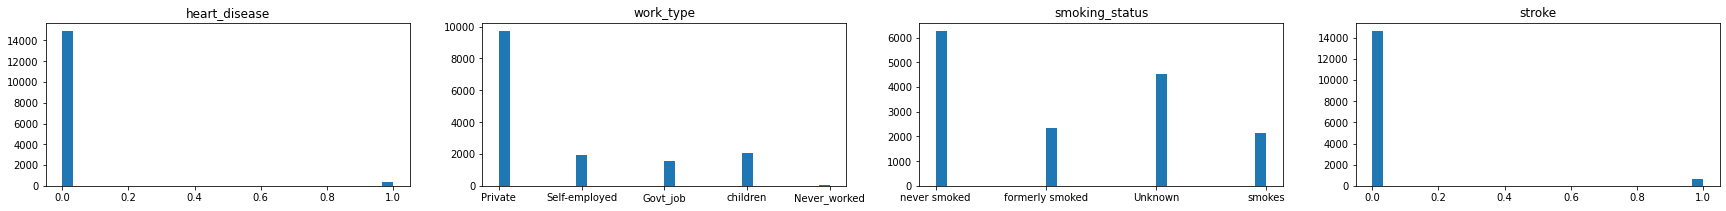

In [77]:
DI.hists(df.loc[:,['heart_disease','work_type','smoking_status','stroke']]) #closer look

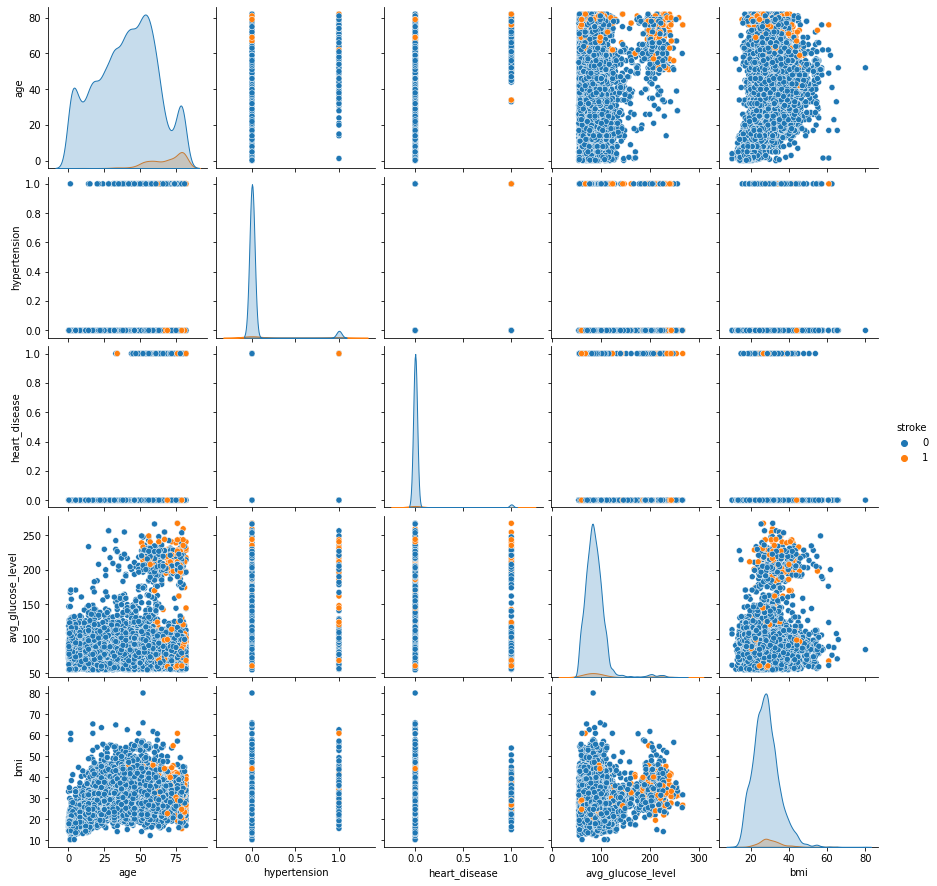

In [107]:
import seaborn as sns
sns.pairplot(df,hue="Attrition")

In [96]:
from catboost import CatBoostClassifier, Pool, cv
cat = CatBoostClassifier()

cat_feats=[]
for i in range(len(df.columns)):
    if df.dtypes[i]==np.object_:
        cat_feats.append(i)

X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values
N=df.shape[0]
tr=N*9//10
cat.fit(X[:tr],y[:tr],cat_features=cat_feats,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[1472   55]
 [   1    3]]


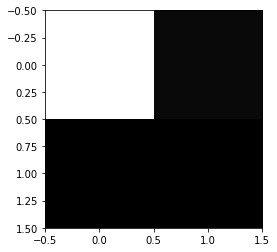

In [102]:
from sklearn.metrics import confusion_matrix
y_pred=cat.predict(X[tr:])
plt.imshow(confusion_matrix(y_pred,y[tr:]),'gray')
print(confusion_matrix(y_pred,y[tr:]))

In [9]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]